In [1]:
# data mainpulation 
import numpy as np
import pandas as pd

# plots and graphs
import matplotlib.pyplot as plt

# function fit
from scipy.optimize import curve_fit

# disable warnings
import warnings
warnings.filterwarnings('ignore')

# save output
import os
import csv

#### Chapman-Richards Growth Function

In [2]:
def growth_curve(age, A, k, p):
    return A * (1 - np.exp(-k * age))**p

#### Western Redcedar

In [3]:
# age
x_data_wrc = np.array([3.2725527831094, 10.1823416506717, 20.0287907869481, 29.7024952015355, 40.9309021113243, 51.1228406909788, 60.9692898272552, 69.2610364683301, 81.6986564299424, 91.0268714011516, 93.0998080614203])
# AGB
y_data_wrc = np.array([0.295634424942883, 0.295634424942883, 0.295634424942883, 21.5687204068738, 63.0064044975374, 101.545223581636, 140.952793933893, 172.685649384557, 216.862595121045, 247.898954297313, 254.885649014824])

In [4]:
params_wrc, _ = curve_fit(growth_curve, x_data_wrc, y_data_wrc, [360.632855720095, 0.0284468067037396, 4.83046101554209])
params_wrc

array([3.60323746e+02, 2.84960941e-02, 4.84109901e+00])

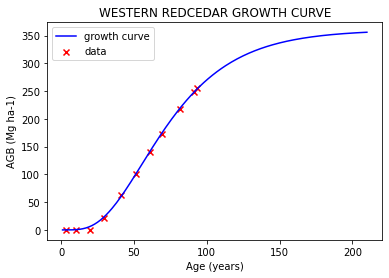

In [5]:
plt.scatter(x_data_wrc, y_data_wrc, label='data', marker='x', c='r')
x = np.linspace(1, 210, 210)
plt.plot(x, growth_curve(x, *params_wrc), 'b-', label='growth curve')

plt.title('WESTERN REDCEDAR GROWTH CURVE')
plt.xlabel('Age (years)')
plt.ylabel('AGB (Mg ha-1)')
plt.legend()
plt.show()

#### Yield table

In [6]:
agb_values = [growth_curve(age, *params_wrc) for age in range(201)]
header     = ['LifeZone', 'AIDBSPP'] + list(range(201))
#'Boreal moist forest', 'Cool temperate steppe', 'Polar desert','Polar rain tundra','Polar wet tundra'
life_zones = ['Boreal rain forest','Boreal wet forest',
             'Cool temperate moist forest','Cool temperate rain forest','Cool temperate wet forest',
             'Warm temperate moist forest','Unspecified']
species    = 'Western redcedar'

In [7]:
if not os.path.exists('output'):
    os.makedirs('output')

with open(os.path.join('output', 'Growth_Curves_wrc.csv'), 'w') as gc_file:
    gc_writer = csv.writer(gc_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    gc_writer.writerow(header)
    for life_zone in life_zones:
        gc_writer.writerow([life_zone] + [species] + agb_values)

In [8]:
data = pd.read_csv(os.path.join('output', 'Growth_Curves_wrc.csv'))
print(data)

                      LifeZone           AIDBSPP    0         1         2  \
0           Boreal rain forest  Western redcedar  0.0  0.000011  0.000298   
1            Boreal wet forest  Western redcedar  0.0  0.000011  0.000298   
2  Cool temperate moist forest  Western redcedar  0.0  0.000011  0.000298   
3   Cool temperate rain forest  Western redcedar  0.0  0.000011  0.000298   
4    Cool temperate wet forest  Western redcedar  0.0  0.000011  0.000298   
5  Warm temperate moist forest  Western redcedar  0.0  0.000011  0.000298   
6                  Unspecified  Western redcedar  0.0  0.000011  0.000298   

         3         4         5         6         7  ...         191  \
0  0.00198  0.007449  0.020509  0.046354  0.091443  ...  352.837414   
1  0.00198  0.007449  0.020509  0.046354  0.091443  ...  352.837414   
2  0.00198  0.007449  0.020509  0.046354  0.091443  ...  352.837414   
3  0.00198  0.007449  0.020509  0.046354  0.091443  ...  352.837414   
4  0.00198  0.007449  0.0205